In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

data = pd.read_csv("out/data.csv", sep='\s*,\s*', engine='python')
sns.set_style("whitegrid")
data.head()

method  cores       time
0       seq      1  10.645648
1   par-dyn      1  10.298100
2  par-stat      1  10.124517
3   par-dyn      4   2.900999
4  par-stat      4   2.942294

In [29]:
time_serial = data[data['cores'] == 1]['time']
data['speedup'] = time_serial / data['time']
#data['eff'] = data['speedup'] / data['cores']
data.head(10)

method  cores       time  speedup
0       seq      1  10.645648      1.0
1   par-dyn      1  10.298100      1.0
2  par-stat      1  10.124517      1.0
3   par-dyn      4   2.900999      NaN
4  par-stat      4   2.942294      NaN
5   par-dyn      8   1.674194      NaN
6  par-stat      8   1.686229      NaN
7   par-dyn     12   1.373793      NaN
8  par-stat     12   1.481330      NaN
9   par-dyn     16   1.303145      NaN

In [44]:
seqLinearTime = []
seqLinearSpeedup = []
for i in [data['cores'].unique()]:
    seqLinearTime.append(time_serial / i)
    seqLinearSpeedup.append(i)
seqLinearTime

[0    10.645648
 1    10.298100
 2    10.124517
 Name: time, dtype: float64, 0    2.661412
 1    2.574525
 2    2.531129
 Name: time, dtype: float64, 0    1.330706
 1    1.287262
 2    1.265565
 Name: time, dtype: float64, 0    0.887137
 1    0.858175
 2    0.843710
 Name: time, dtype: float64, 0    0.665353
 1    0.643631
 2    0.632782
 Name: time, dtype: float64]

In [45]:
import matplotlib.ticker as ticker
ax1.yaxis.set_major_locator(ticker.MultipleLocator(100))
ax1.yaxis.set_major_formatter(ticker.ScalarFormatter())

# Runtime

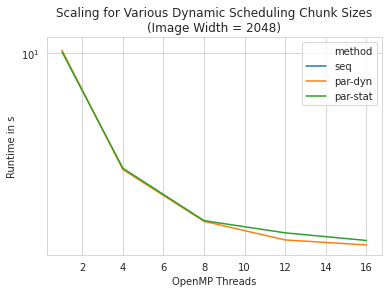

In [48]:
ax1 = sns.lineplot(data=data, x=data['cores'], y=data['time'], hue=data['method'], palette="tab10")
ax1.plot(data['cores'].unique(), seqLinearTime, c="blue", ls=":", mec="gray", mew=0.1)
#plt.axhline(y=time_serial, color='r', linestyle='-')
# plt.plot([time_serial], marker=11)
ax1.set(yscale="log", ylabel='Runtime in s', xlabel='OpenMP Threads', title='Scaling for Various Dynamic Scheduling Chunk Sizes\n(Image Width = 2048)')
plt.savefig("runtime-loops.pdf", bbox_inches='tight')

In [151]:
plt.clf()

<Figure size 432x288 with 0 Axes>

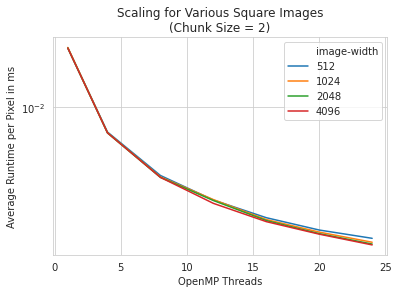

In [152]:
data3 = data[data['chunk-size'] == 2]
data3['time'] = data['time'] / data['image-width'] / data['image-width']
ax1 = sns.lineplot(data=data3, x=data3['cores'], y=data3['time'], hue=data3['image-width'], palette="tab10")
# ax1.plot(data['image-width'].unique(), seqLinearTime, c="blue", ls=":", mec="gray", mew=0.1)
#plt.axhline(y=time_serial, color='r', linestyle='-')
ax1.set(yscale="log", ylabel='Average Runtime per Pixel in ms', xlabel='OpenMP Threads', title='Scaling for Various Square Images\n(Chunk Size = 2)')
plt.savefig("img-width-mandel.pdf", bbox_inches='tight')

In [144]:
plt.clf()

<Figure size 432x288 with 0 Axes>

# Mflop/s

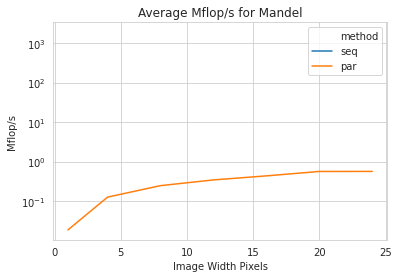

In [84]:
ax1 = sns.lineplot(data=data, x=data['cores'], y=data['Mflops'], hue=data['method'], palette="tab10")
#ax1.plot(data['image-width'].unique(), seqLinearTime, c="blue", ls=":", mec="gray", mew=0.1)
ax1.set(yscale="log", ylabel='Mflop/s', xlabel='Image Width Pixels', title='Average Mflop/s for Mandel')
plt.savefig("flops-mandel.pdf", bbox_inches='tight')

In [74]:
plt.clf()

<Figure size 432x288 with 0 Axes>